In [2]:
# Importing libraries 
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.io import fits
import urllib.request
import requests
import time

In [3]:
# Some useful functions to be used ahead

def check_link(path): # Function that takes care of seeing if the file exists on the web or not
    r = requests.head(path)
    status = r.status_code == requests.codes.ok
    if (status == True):
        return True
    else:
        return False

In [4]:

#Getting the individual coadded files names

local_dir = "/home/colgoat/spc_DESIedr/" #path to the catalogs
pn_sv1 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv1/dark/" # File database link for sv1
pn_sv3 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/" # File database link for sv3

EDR_qsolist = [] # List of spectra of interest from DESI EDR

print("\n")
print("---------------------------------------------")
print("\n")

file1 = "QSO_cat_fuji_sv1_dark_bal_mask_v1.0.fits" # Name of the first catalog (sv1)
lc_sv1 = os.path.join(local_dir,file1) # lc_sv1 = Local file sv1
fc_sv1 = fits.open(lc_sv1) # fc_sv1 = Open .fits catalog file of sv1
SV1 = Table.read(fc_sv1) # SV1 = Reading the file of SV1 as a BinTable 
q_sv1 = (SV1['Z']>=2.1) & (SV1['PROGRAM']=='dark') # q_sv1 = Query from main catalog (filtering)
catfil_sv1 = SV1[q_sv1] # catfil_sv1 = Filtered catalog sv1
catfil_sv1_hpix = catfil_sv1.group_by("HPXPIXEL") # catfil_sv1 = Grouping filtered catalog by HEALPIX criteria
HPX_sv1 = catfil_sv1_hpix["HPXPIXEL"]/100 # HPX_sv1 = Getting the healpix ID for path on database

print("Number of spectra in SV1: ",len(catfil_sv1)) # Showing the number of targets on screen
for p,m in zip(HPX_sv1,catfil_sv1_hpix["HPXPIXEL"]): # Adding selected Targets to the list
    EDR_qsolist.append(pn_sv1+str(int(p))+"/"+str(m)+"/coadd-sv1-dark-"+str(m)+".fits")
fc_sv1.close()

file2 = "QSO_cat_fuji_sv3_dark_bal_mask_v1.0.fits" # Name of the first catalog (sv3)
lc_sv3 = os.path.join(local_dir,file2) # lc_sv3 = Local file sv3
fc_sv3 = fits.open(lc_sv3) # fc_sv3 = Open .fits catalog file of sv3
SV3 = Table.read(fc_sv3) # SV3 = Reading the file of SV3 as a BinTable
q_sv3 = (SV3['Z']>=2.1) & (SV3['PROGRAM']=='dark') # q_sv3 = Query from main catalog (filtering)
catfil_sv3 = SV3[q_sv3] # catfil_sv3 = Filtered catalog sv3
catfil_sv3_hpix = catfil_sv3.group_by("HPXPIXEL") # catfil_sv3 = Grouping filtered catalog by HEALPIX criteria
HPX_sv3 = catfil_sv3_hpix["HPXPIXEL"]/100 # HPX_sv3 = Getting the healpix ID for path on database

print("Number of spectra in SV3: ",len(catfil_sv3))
for p,m in zip(HPX_sv3,catfil_sv3_hpix["HPXPIXEL"]): # Adding selected Targets to the list
    EDR_qsolist.append(pn_sv3+str(int(p))+"/"+str(m)+"/coadd-sv3-dark-"+str(m)+".fits")
fc_sv3.close()


EDRcat_stk = vstack(([catfil_sv1_hpix,catfil_sv3_hpix])) # EDR filtered catalogs stacked for both surveys and sorted
EDRcat_stk.sort(['SURVEY','HPXPIXEL'])


print("Total number of DESI EDR spectra (SV1 & SV3) to be used: ",len(EDR_qsolist))

# Creating the list containing the number of files on database grouped by HEALPIX 

web_list = np.unique(EDR_qsolist) # List of web links to be tested (sorted) 
#web_list.sort()

nf_coadd = [] # nf_coadd = Name of files on folder related to the coadded names 

for b in range(len(web_list)):
    if (len(str(web_list[b])) == 105):
        nf_coadd.append(str(web_list[b][81:105]))
    if (len(str(web_list[b])) == 108):
        nf_coadd.append(str(web_list[b][83:108]))
    
print("List of files to be downloaded and/or modified: ",len(web_list))

print("\n")
print("---------------------------------------------")
print("\n")



---------------------------------------------




Number of spectra in SV1:  11853
Number of spectra in SV3:  14910
Total number of DESI EDR spectra (SV1 & SV3) to be used:  26763
List of files to be downloaded and/or modified:  1247


---------------------------------------------




In [5]:
EDRcat_stk

TARGETID,Z,ZERR,ZWARN,SPECTYPE,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,PROBA_RF,MASKBITS,SV1_DESI_TARGET,SV1_SCND_TARGET,DESI_TARGET,COADD_NUMEXP,COADD_EXPTIME,CMX_TARGET,SV2_DESI_TARGET,SV3_DESI_TARGET,SV2_SCND_TARGET,SV3_SCND_TARGET,SCND_TARGET,TSNR2_LYA,TSNR2_QSO,DELTA_CHI2_MGII,A_MGII,SIGMA_MGII,B_MGII,VAR_A_MGII,VAR_SIGMA_MGII,VAR_B_MGII,Z_RR,Z_QN,C_LYA,C_CIV,C_CIII,C_MgII,C_Hbeta,C_Halpha,Z_LYA,Z_CIV,Z_CIII,Z_MgII,Z_Hbeta,Z_Halpha,QSO_MASKBITS,HPXPIXEL,SURVEY,PROGRAM,PCA_COEFFS,PCA_CHI2,BAL_PROB,BI_CIV,ERR_BI_CIV,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,POSMIN_CIV_2000,FMIN_CIV_2000,AI_CIV,ERR_AI_CIV,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,POSMIN_CIV_450,FMIN_CIV_450,BI_SIIV,ERR_BI_SIIV,NSIIV_2000,VMIN_SIIV_2000,VMAX_SIIV_2000,POSMIN_SIIV_2000,FMIN_SIIV_2000,AI_SIIV,ERR_AI_SIIV,NSIIV_450,VMIN_SIIV_450,VMAX_SIIV_450,POSMIN_SIIV_450,FMIN_SIIV_450,BALMASK,Z_MASK,ZERR_MASK,ZWARN_MASK,CHI2_MASK,DELTACHI2_MASK,SPECTYPE_MASK,SNR_CIV
,,,,,,deg,deg,,mag,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,km / s,km / s,,km / s,km / s,km / s,,km / s,km / s,,km / s,km / s,km / s,,km / s,km / s,,km / s,km / s,km / s,,km / s,km / s,,km / s,km / s,km / s,,,,,,,,,
int64,float64,float64,int64,str6,int32,float64,float64,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int16,float32,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int64,str3,str4,float32[5],float32,float32,float32,float32,int32,float32[5],float32[5],float32[5],float32[5],float32,float32,int32,float32[17],float32[17],float32[17],float32[17],float32,float32,int32,float32[5],float32[5],float32[5],float32[5],float32,float32,int32,float32[17],float32[17],float32[17],float32[17],uint8,float64,float64,int64,float64,float64,str6,float64
39628215118992442,2.1837342473623393,0.00013626615461198534,0,QSO,0,130.64931448777944,17.92248565776863,PSF,0.023616284,3.5690012,3.1463985,4.338265,7.2705436,6.3402815,1239.8733,408.09125,75.880165,2.8767319,0.6142675,0.9239833775496703,0.9239833775496703,0.9239833775496703,0.9239833775496703,0.9239833775496703,0.9943965839147568,0,54047318697103110,0,0,6,6083.957,0,0,0,0,0,0,293.5955,112.386826,23.017323,0.21148743,-35.7064,0.68574977,0.0004154714,21.983559,0.0001771788,2.1837342,2.181272,1.0,0.8930895,0.9996561,0.9999963,2.249572e-05,1.7975288e-05,2.181272,2.1808524,2.188304,2.1916366,-0.19505365,-0.1221109,14,4679,sv1,dark,61.846046 .. 2.4299164,1.4206071,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0,-1.0,-1.0,-1,-1.0,-1.0,-1,4.686259937194885
39628209360211028,2.379998216697697,0.0001367309022860157,0,QSO,0,130.64326258132235,17.790880437347397,PSF,0.02099619,5.5868263,6.355662,8.894712,17.68829,29.616795,472.5694,231.43127,51.24521,2.6626232,0.5704455,0.9321236482870953,0.9321236482870953,0.9321236482870953,0.9321236482870953,0.9321236482870953,0.9981658909320831,0,4665733337124491014,34359869440,0,6,6083.957,0,0,0,0,0,0,299.52124,115.79789,252.642,0.8162872,27.105427,1.2413735,0.0011176108,1.7980521,0.0002412979,2.3799982,2.381573,0.9999887,0.99999917,0.99999946,0.9999993,3.1276253e-05,5.6267647e-05,2.3844068,2.3840988,2.381573,2.380935,0.3083418,-0.20571752,14,4679,sv1,dark,106.65552 .. -2.613535,1.7681665,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-

In [6]:
file_cor = "qso_catalog_sv13.fits" # Name of the first catalog (sv1)
lc_cor = os.path.join(local_dir,file_cor) # lc_sv1 = Local file sv1
fc_cor = fits.open(lc_cor) # fc_sv1 = Open .fits catalog file of sv1
cat_cor = Table.read(fc_cor)
w = (cat_cor['Z']>=2.1) & (cat_cor['PROGRAM']=='dark') # q_sv1 = Query from main catalog (filtering)
cat_cor = cat_cor[w]
cat_cor

TARGETID,Z,ZERR,ZWARN,SPECTYPE,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,PROBA_RF,MASKBITS,SV1_DESI_TARGET,SV1_SCND_TARGET,DESI_TARGET,COADD_NUMEXP,COADD_EXPTIME,CMX_TARGET,SV2_DESI_TARGET,SV3_DESI_TARGET,SV2_SCND_TARGET,SV3_SCND_TARGET,SCND_TARGET,TSNR2_LYA,TSNR2_QSO,DELTA_CHI2_MGII,A_MGII,SIGMA_MGII,B_MGII,VAR_A_MGII,VAR_SIGMA_MGII,VAR_B_MGII,Z_RR,Z_QN,C_LYA,C_CIV,C_CIII,C_MgII,C_Hbeta,C_Halpha,Z_LYA,Z_CIV,Z_CIII,Z_MgII,Z_Hbeta,Z_Halpha,QSO_MASKBITS,HPXPIXEL,SURVEY,PROGRAM,LASTNIGHT,PCA_COEFFS,PCA_CHI2,BAL_PROB,BI_CIV,ERR_BI_CIV,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,POSMIN_CIV_2000,FMIN_CIV_2000,AI_CIV,ERR_AI_CIV,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,POSMIN_CIV_450,FMIN_CIV_450,BI_SIIV,ERR_BI_SIIV,NSIIV_2000,VMIN_SIIV_2000,VMAX_SIIV_2000,POSMIN_SIIV_2000,FMIN_SIIV_2000,AI_SIIV,ERR_AI_SIIV,NSIIV_450,VMIN_SIIV_450,VMAX_SIIV_450,POSMIN_SIIV_450,FMIN_SIIV_450,BALMASK
int64,float64,float64,int64,str6,int32,float64,float64,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int16,float32,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int64,str3,str4,int64,float32[5],float32,float32,float32,float32,int32,float32[5],float32[5],float32[5],float32[5],float32,float32,int32,float32[17],float32[17],float32[17],float32[17],float32,float32,int32,float32[5],float32[5],float32[5],float32[5],float32,float32,int32,float32[17],float32[17],float32[17],float32[17],uint8
39628362695576436,2.8416229272676015,0.00032908791013198203,0,QSO,0,197.14390063990936,24.52098352105162,PSF,0.01735756,2.3939388,3.1558244,3.0474098,3.3776402,6.646939,1261.5374,438.6839,85.196915,3.6998565,0.798743,0.943547462409841,0.943547462409841,0.943547462409841,0.943547462409841,0.943547462409841,0.9813056305646897,0,54043195528495108,0,0,6,4035.6438,0,0,0,0,0,0,647.7955,169.77591,--,--,--,--,--,--,--,2.8416228,2.8446302,0.999997,0.99999416,0.9999999,7.459293e-05,1.4724725e-05,4.361528e-05,2.8442981,2.8439817,2.8446302,0.4838516,-0.094580084,0.034311153,10,10282,sv1,dark,20210403,35.26518 .. -0.19467184,1.2041646,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0
39628362691384025,2.241123990212007,0.00013619029778055847,0,GALAXY,0,196.9679519879933,24.56685640575941,PSF,0.018219369,3.9227269,5.548474,6.6379075,8.6862,11.593429,1343.1218,474.38766,106.84847,3.5014746,0.79002535,0.9408291455349964,0.9408291455349964,0.9408291455349964,0.9408291455349964,0.9408291455349964,0.9948333728313447,0,4665729213955883012,131072,0,6,4035.6438,0,0,0,0,0,0,644.00146,179.21617,4.543879,-2695.9287,7988.7046,2698.2803,-26377143000000.0,-57683927000000.0,-26377143000000.0,0.38234955,2.2411656,1.0,1.0,0.9999896,0.9999998,4.5593447e-06,3.392021e-06,2.2411656,2.240448,2.2410743,2.235775,0.7045512,-0.04391338,24,10282,sv1,dark,20210403,80.79744 .. 0.5062046,1.3529189,0.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,8.348205,2.2783027,1,12431.525 .. -1.0,12960.832 .. -1.0,12802.04 .. -1.0,0.28305736 .. -1.0,0
39628368198500958,2.8737682616418354,0.0003963213065264614,0,QSO,0,197.3543040445033,24.70854692704085,PSF,0.016603509,0.7753115,1.078134,0.94954526,0.99991345,2.2617981,761.6638,128.2516,27.794256,3.9494672,0.85433364,0.9459323313378998,0.9459323313378998,0.94593233133

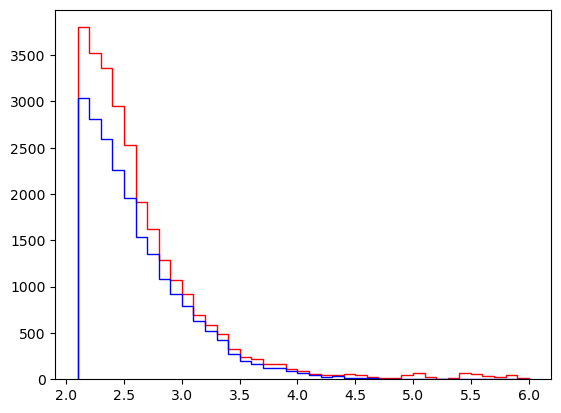

In [7]:
# A index o BI_CIV.
# El P1D calculado viene en el paper de Corentin en un link para descargar.
# Hacer lo de las carpetas para los archivos healpix.
# Paper Corentin: Data aviability en un link del articulo para descargar los datos para comparar.
f = 'Z'
f = str(f)
plt.hist(EDRcat_stk[f], bins=np.arange(min(EDRcat_stk[f]), max(EDRcat_stk[f]) + 0.1, 0.1) \
, ec="red", facecolor="none", histtype='step')
plt.hist(cat_cor[f], bins=np.arange(min(cat_cor[f]), max(cat_cor[f]) + 0.1, 0.1),ec="blue", facecolor="none", histtype='step')
plt.show()

In [9]:
svs = []
cor = []

for i in range(len(EDRcat_stk)):
    svs.append(int(EDRcat_stk['TARGETID'][i]))
print(len(svs))
for a in range(len(cat_cor)):
    cor.append(int(cat_cor['TARGETID'][a]))
print(len(cor))

np.savetxt('/home/colgoat/Jupyter/desi_test/svs.txt',svs, fmt = '%s', delimiter = ',')
np.savetxt('/home/colgoat/Jupyter/desi_test/cor.txt',cor, fmt = '%s', delimiter = ',')

26763
21133


In [8]:
np.savetxt('/home/colgoat/Spyder/DESI_weblist.txt',web_list, fmt = '%s', delimiter = ',')

In [ ]:
# Checking if the files exist on the web

'''chw_list = [] # chw_list = Check web list

for i in range(len(web_list)):
    chw_list.append(check_link(web_list[i]))
    
chw_list = np.array(chw_list)

print("---------------------------------------------")
print("\n")

print("Number of links working on database: ",np.count_nonzero(chw_list == True))
print("Links not found: ",np.count_nonzero(chw_list == False))

print("\n")
print("---------------------------------------------")
print("\n")'''


In [12]:
# Checking if the files exist on the directory

df_list = os.listdir(local_dir) # df_list = Downloaded files (Excluding catalogs)
df_list.sort()
df_list = np.array(df_list)

fi_f = np.char.find(df_list, "coadd", start=0, end=None) ## fi_f = File (coadded) identification on folder

y = 0 # part of the list
n = 0 # not part of the list

for i in range(len(df_list)):
    if (fi_f[i]==(-1)):
        n = n + 1
    elif(fi_f[i]==(0)):
        y = y + 1

print("---------------------------------------------")
print("\n")

print(f"Coadded files on folder: {y}/{len(web_list)}")
print(f"To be downloaded: {len(web_list)-(y)}/{len(web_list)}")

print("\n")
print("---------------------------------------------")
print("\n")
print("---------------------------------------------")
print("\n")

print(f"DOWNLOADING AND MODIFYING COADD FILES")

print("\n")
print("---------------------------------------------")
print("\n")

---------------------------------------------


Coadded files on folder: 2/1247
To be downloaded: 1245/1247


---------------------------------------------


---------------------------------------------


DOWNLOADING AND MODIFYING COADD FILES


---------------------------------------------




In [15]:
for f in range(20):
    f_tbm = os.path.join(local_dir,nf_coadd[f]) # f_tbm = Path to the file to be modified
    
    f_r = nf_coadd[f].replace('.fits', '.txt')# Changing .fits for .txt
    f_r = f_r.replace('coadd', 'report_codd')# Changing coadd for report
    f_r = os.path.join(local_dir,f_r) # f_r = File report in txt generated after the download, this in order to avoid downloading issues
    
    # To make the download it is necessary that the file fits or the download report is not present
    
    if not (os.path.exists(f_tbm) and os.path.exists(f_r)):
        print(f"({f+1}/{len(web_list)}) Downloading {nf_coadd[f]} ...")
        download = urllib.request.urlretrieve(web_list[f], f_tbm) # Downloading files
        
        if (len(str(nf_coadd[f])) == 25): # Extracting HPXPIXEL and SURVEY value on list
            sv = nf_coadd[f][6:9]
            hpix = nf_coadd[f][15:20]
        elif(len(str(nf_coadd[f])) == 24):
            hpix = nf_coadd[f][15:19]
            sv = nf_coadd[f][6:9]
            
        hpx_query = (EDRcat_stk['HPXPIXEL'] == int(hpix)) & (EDRcat_stk['SURVEY'] == str(sv)) # hpx_query = HEALPIX and SV Query on stacked catalog
        tmp_cat = EDRcat_stk[hpx_query] # Temporary catalog restricted to a specific value of HEALPIX
        
        jdf = Table.read(f_tbm) # jdf = (Just Downloaded file ) Open file just downloaded to match with stacked catalog

        selected = [] # Targets selected to be extracted
        for x in range(len(tmp_cat)):
            selected.append(tmp_cat["TARGETID"][x])

        chosen_ini = np.array(selected)
        chosen_bool = np.isin(jdf["TARGETID"],chosen_ini)
        chosen_ibool = np.invert(chosen_bool)

        idx = np.where(chosen_ibool)
        print(f"Targets on cat: {len(chosen_ini)} , Total in coadded: {len(chosen_bool)} , Rejected: {len(idx[0])}")
        
        # Modifying the file to get the selected spectra
        
        with fits.open(f_tbm , mode='update') as hdul:
            
            HDUnames = ['PRIMARY','FIBERMAP','EXP_FIBERMAP', \
                       "B_WAVELENGTH","B_FLUX","B_IVAR","B_MASK","B_RESOLUTION", \
                       "R_WAVELENGTH","R_FLUX","R_IVAR","R_MASK","R_RESOLUTION", \
                       "Z_WAVELENGTH","Z_FLUX","Z_IVAR","Z_MASK","Z_RESOLUTION", \
                       "SCORES"]
            #First: BinaryTable (catalog)
            T1 = Table.read(hdul[1])
            T1.remove_rows(idx)
            hdu_f = fits.BinTableHDU(T1, name = HDUnames[1]) #First hdu
            hdul[1] = hdu_f

            #Image HDU arrays (spectra) 12 (4-7,9-12,14-17)

            for i in range(15):
                c = i+3 #counter
                if ((c != 3) and (c != 8) and (c != 13)):
                            hdu_temp = hdul[c].data
                            hdu_temp = np.delete(hdu_temp,np.invert(chosen_bool),0)
                            hdu_ff = fits.ImageHDU(hdu_temp,name = HDUnames[c]) #hdu for file
                            hdul[c] = hdu_ff

            #Last: BinaryTable (scores)
            T2 = Table.read(hdul[18])
            T2.remove_rows(idx)
            hdu_l = fits.BinTableHDU(T2, name = HDUnames[18]) #Last hdu
            hdul[18] = hdu_l

            hdul.flush()
            hdul.close()
        
        # Making the report as .txt
        with open(f_r, 'w') as report:
            report.write(f"File: {nf_coadd[f]} \n")
            report.write(f"Targets on cat: {len(chosen_ini)} , Total in coadded: {len(chosen_bool)} , Rejected: {len(idx[0])} \n")
            report.write("\n")
            report.write("---------------------------------------------")
            report.write("\n")

            for z in range(len(selected)):
                report.write(f" {selected[z]} \n")

            report.write("\n")
            report.write("---------------------------------------------")
            report.write("\n")   
            report.write("FILE on folder and modified!! \n")
            report.close()
        
        
        print ("FILE on folder and modified!! \n")
    else:
        print(f"({f+1}/{len(web_list)}) {nf_coadd[f]} ON DISK!! \n")
            

print("\n")
print("---------------------------------------------")
print("\n")

print(f"All Done!!!")

print("\n")
print("---------------------------------------------")
print("\n")
        


(1/1247) coadd-sv1-dark-10282.fits ON DISK!! 

(2/1247) coadd-sv1-dark-10347.fits ON DISK!! 

(3/1247) coadd-sv1-dark-10350.fits ON DISK!! 

(4/1247) coadd-sv1-dark-10351.fits ON DISK!! 

(5/1247) coadd-sv1-dark-10368.fits ON DISK!! 

(6/1247) coadd-sv1-dark-10369.fits ON DISK!! 

(7/1247) coadd-sv1-dark-10370.fits ON DISK!! 

(8/1247) coadd-sv1-dark-10371.fits ON DISK!! 

(9/1247) coadd-sv1-dark-10372.fits ON DISK!! 

(10/1247) coadd-sv1-dark-10374.fits ON DISK!! 

(11/1247) coadd-sv1-dark-10375.fits ON DISK!! 

(12/1247) coadd-sv1-dark-10376.fits ON DISK!! 

(13/1247) coadd-sv1-dark-10377.fits ON DISK!! 

(14/1247) coadd-sv1-dark-10378.fits ON DISK!! 

(15/1247) coadd-sv1-dark-10379.fits ON DISK!! 

(16/1247) coadd-sv1-dark-10380.fits ON DISK!! 

(17/1247) coadd-sv1-dark-10381.fits ON DISK!! 

(18/1247) coadd-sv1-dark-10382.fits ON DISK!! 

(19/1247) coadd-sv1-dark-10400.fits ON DISK!! 

(20/1247) coadd-sv1-dark-10402.fits ON DISK!! 



---------------------------------------------



In [15]:
# Checking if the files exist on the directory

df_list = os.listdir(local_dir) # df_list = Downloaded files (Excluding catalogs)
df_list.sort()
df_list = np.array(df_list)

fi_f = np.char.find(df_list, "coadd", start=0, end=None) ## fi_f = File (coadded) identification on folder

y = 0 # part of the list
n = 0 # not part of the list

for i in range(len(df_list)):
    if (fi_f[i]==(-1)):
        n = n + 1
    elif(fi_f[i]==(0)):
        y = y + 1

print("---------------------------------------------")
print("\n")

print(f"Coadded files on folder: {y}/{len(web_list)}")
print(f"To be downloaded: {len(web_list)-(y)}/{len(web_list)}")

print("\n")
print("---------------------------------------------")
print("\n")
print("---------------------------------------------")
print("\n")

print(f"DOWNLOADING AND MODIFYING COADD FILES")

print("\n")
print("---------------------------------------------")
print("\n")

---------------------------------------------


Coadded files on folder: 7/1247
To be downloaded: 1240/1247


---------------------------------------------


---------------------------------------------


DOWNLOADING AND MODIFYING COADD FILES


---------------------------------------------




In [19]:


for b in range(len(web_list)):
    if (len(str(web_list[b])) == 105):
        nf_coadd.append(str(web_list[b][81:105]))
    if (len(str(web_list[b])) == 108):
        nf_coadd.append(str(web_list[b][83:108]))

In [18]:
HPX_sv1 = np.array(HPX_sv1)
HPX_sv3 = np.array(HPX_sv3)

FSV1 = HPX_sv1 #Folders SV1
FSV3 = HPX_sv3 #Folders SV3
len(FSV1)+len(FSV3)

#os.mkdir(local_dir+'/'+str(int(FSV1[0])))
#web_list[0]

26763

In [20]:
df_list = os.listdir(local_dir) # df_list = Downloaded files (Excluding catalogs)
df_list.sort()
df_list = np.array(df_list)

fi_f = np.char.find(df_list, "coadd", start=0, end=None) ## fi_f = File (coadded) identification on folder

fi_f

array([-1, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
survy = []
healpix_vl = []

for x in range(len(nf_coadd)):
        if (len(str(nf_coadd[x])) == 25): # Extracting HPXPIXEL and SURVEY value on list
            survy.append(nf_coadd[x][6:9])
            healpix_vl.append(nf_coadd[x][15:20])
        elif(len(str(nf_coadd[x])) == 24):
            survy.append(nf_coadd[x][6:9])
            healpix_vl.append(nf_coadd[x][15:19])

In [ ]:
test = (EDRcat_stk['HPXPIXEL'] == int(healpix_vl[0])) & (EDRcat_stk['SURVEY'] == str(survy[0]))
tmp = EDRcat_stk[test]
tmp.sort(['TARGETID'])


prueba = fits.open(f'/home/colgoat/spc_DESIedr/coadd-{survy[0]}-dark-{healpix_vl[0]}.fits')

t = Table.read(prueba[1])
t.sort(['TARGETID'])

for R in range(len(tmp)):
    if ( (tmp['TARGETID'][R]==t['TARGETID'][R]) and (tmp['TARGET_RA'][R]==t['TARGET_RA'][R]) and (tmp['TARGET_DEC'][R]==t['TARGET_DEC'][R]) ):
        print(f"All good for: {t['TARGETID'][R]}")
    else:
        print(f"Something failed for: {t['TARGETID'][R]}")
print(len(tmp),len(t))




In [ ]:
test = (EDRcat_stk['HPXPIXEL'] == HealPix) & (EDRcat_stk['SURVEY'] == "sv1")

tmp = EDRcat_stk[test]

tmp.sort(['TARGETID'])

tmp

In [ ]:
prueba = fits.open(f'/home/colgoat/spc_DESIedr/coadd-sv1-dark-{str(HealPix)}.fits')

t = Table.read(prueba[1])
t.sort(['TARGETID'])
t

In [ ]:
for R in range(len(tmp)):
    if ( (tmp['TARGETID'][R]==t['TARGETID'][R]) and (tmp['TARGET_RA'][R]==t['TARGET_RA'][R]) and (tmp['TARGET_DEC'][R]==t['TARGET_DEC'][R]) ):
        print(f"All good for: {t['TARGETID'][R]}")